## [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- Actually a linear classification model.
- Also called _logit regression_, _max-entropy classification_, or _log-linear classifier_.
- The probabilities of the possible outcomes of a single trial are modeled using a [logistic function](https://en.wikipedia.org/wiki/Logistic_function).
- The Scikit-Learn implementation can fit binary, One-vs-Rest or Multinomial LR with optional $\ell_1$, $\ell_2$ or Elastic-Net regularization.
- Both dense and sparse inputs are supported.
- Use C-ordered arrays or CSR matrices (64b floats) for optimal performance. Other datatypes will be converted & copied.

#### Solvers:
- **"liblinear"**: uses coordinate descent & relies on [LIBLINEAR](https://www.csie.ntu.edu.tw/~cjlin/liblinear/).
- **"newton-cg"**:
- **"[lbfgs](http://users.iems.northwestern.edu/~nocedal/lbfgsb.html)"**: approximates Broyden-Fletcher-Goldfarb-Shanno algorithm. Use only for smaller datasets, but this is the default due to its robustness.
- **"[sag](https://hal.inria.fr/hal-00860051/document)"**: uses Stochastic Average gradient descent. Optimized for large datasets.
- **"[saga](https://arxiv.org/abs/1407.0202)"**: variant of SAG that supports ```penalty="l1"```. Optimized for sparse multinomial LR. This is the only solver that supports ```penalty="elasticnet"```.

#### Feature Selection:
- Logistic regression with $\ell_1$ penalty returns sparse models which can be used for feature selection.

#### P-value Estimates:
- You can find coefficient p-values and confidence intervals in non-penalized regression cases. The [statsmodel](https://pypi.org/project/statsmodels/) package supports this.

#### Cross-validation:
- Built-in cross-validation to find optimal ```C``` and ```l1_ratio``` params is available via [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV).
- The 'newton-cg','sag','saga' and 'lbfgs' solvers are best for high-D dense data due to warm starting.

In [1]:
# LR using iris dataset
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

clf.predict(      X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

/home/bjpcjp/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

## Example: L1 Penalty vs Sparsity
- compares % of zero coefficients when L1, L2 & Elastic-Net penalties are used for different values of C.
- Large C should give more freedom to the model; smaller C = less freedom.
- Task: classify 8x8 images of digits into two classes: 0-4, 5-9.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
X, y     = datasets.load_digits(return_X_y=True)
X        = StandardScaler().fit_transform(X)
y        = (y > 4).astype(np.int) # classify small vs large digits
l1_ratio = 0.5  # L1 weight - Elastic-Net regularization

C=1.00
Sparsity/L1:                             4.69%
Sparsity/EN:                             4.69%
Sparsity/L2:                             4.69%
Score/L1:                                0.90
Score/EN:                                0.90
Score/L2:                                0.90
C=0.10
Sparsity/L1:                             26.56%
Sparsity/EN:                             12.50%
Sparsity/L2:                             4.69%
Score/L1:                                0.90
Score/EN:                                0.90
Score/L2:                                0.90
C=0.01
Sparsity/L1:                             84.38%
Sparsity/EN:                             68.75%
Sparsity/L2:                             4.69%
Score/L1:                                0.86
Score/EN:                                0.88
Score/L2:                                0.89


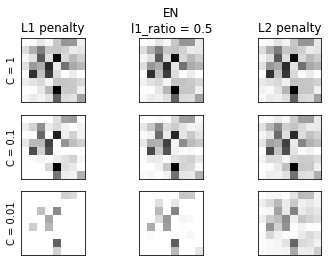

In [4]:
fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(
        C=C, penalty='l1', tol=0.01, solver='saga')
    
    clf_l2_LR = LogisticRegression(
        C=C, penalty='l2', tol=0.01, solver='saga')
    
    clf_en_LR = LogisticRegression(
        C=C, penalty='elasticnet', tol=0.01, solver='saga', l1_ratio=l1_ratio)
    
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity/L1:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity/EN:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity/L2:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score/L1:",     clf_l1_LR.score(X, y)))
    print("{:<40} {:.2f}".format("Score/EN:",     clf_en_LR.score(X, y)))
    print("{:<40} {:.2f}".format("Score/L2:",     clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("EN\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(np.abs(coefs.reshape(8, 8)), 
                  interpolation='nearest',
                  cmap='binary', vmax=1, vmin=0)
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel('C = %s' % C)

plt.show()

## Example: L1 Regularization Path
- Task: train binary classifier on Iris dataset.
- Models ordered from strongest to weakest regularization.
- Using LIBLINEAR solver for efficiency.
- Using low tolerance setting to ensure model converges before collecting coefficients.
- Using ```warm_start=True```: coefficients are reused for next model fit (speeds up computation).

In [5]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X    = iris.data
y    = iris.target
X    = X[y != 2]
y    = y[y != 2]
X   /= X.max()  # Normalize X to speed-up convergence

In [6]:
# Demo path functions

cs    = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)
start = time()
clf   = linear_model.LogisticRegression(penalty='l1', 
                                        solver='liblinear',
                                        tol=1e-6, 
                                        max_iter=int(1e6),
                                        warm_start=True,
                                        intercept_scaling=10000.)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

This took 0.057s


This took 33.358s


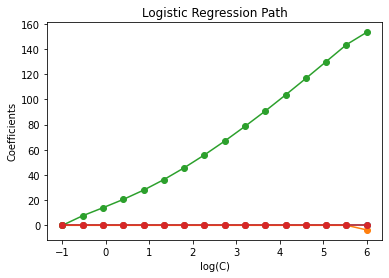

In [7]:
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

## Example: Multinomial and One-vs-Rest LR
- Task: plot decision surface of multinomial & OvR logistic regression on an artifical dataset (3 classes using make_blobs).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [9]:
centers        = [[-5, 0], [0, 1.5], [5, -1]]
X, y           = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X              = np.dot(X, transformation)

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


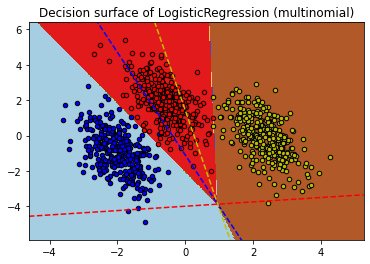

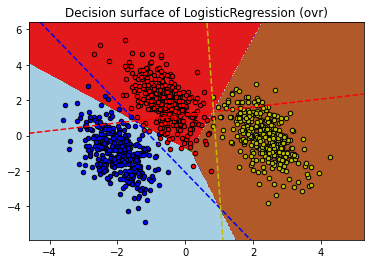

In [10]:
for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh
    h            = .02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy       = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))

    # Plot the decision boundary. Assign color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], 
                    c=color, 
                    cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef       = clf.coef_
    intercept  = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        
        plt.plot([xmin, xmax], 
                 [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

## Example: Multinomial and OvR logistic regression
- Using 20newsgroups dataset.
- Multinomial LR should be faster & more accurate
- Uses L1 sparsity to trim non-informative weights to zero (good if the goal is to extract most discriminative vocabulary of each class). Use L2 penalty instead of looking for best predictive accuracy.

**NOTE: BROKEN FOR NOW. MISSING SKLEARN.EXTERNALS.JOBLIB ERROR.**

In [14]:
import timeit, warnings, numpy as np, matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
#from sklearn.utils import _joblib

In [23]:
'''warnings.filterwarnings("ignore", 
                        category=ConvergenceWarning,
                        module="sklearn")
t0        = timeit.default_timer()
solver    = 'saga'
n_samples = 10000
X, y      = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X         = X[:n_samples]
y         = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
train_samples, n_features = X_train.shape
n_classes                 = np.unique(y).shape[0]
'''

'warnings.filterwarnings("ignore", \n                        category=ConvergenceWarning,\n                        module="sklearn")\nt0        = timeit.default_timer()\nsolver    = \'saga\'\nn_samples = 10000\nX, y      = fetch_20newsgroups_vectorized(subset=\'all\', return_X_y=True)\nX         = X[:n_samples]\ny         = y[:n_samples]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y,\n                                                    random_state=42,\n                                                    stratify=y,\n                                                    test_size=0.1)\ntrain_samples, n_features = X_train.shape\nn_classes                 = np.unique(y).shape[0]\n'

## Example: LR multinomial + L1 classification on MNIST
- Using SAGA solver for speed when n_samples >> n_features, and to optimize non-smooth objective functions (the case with L1 penalties).
- Note: L1-penalized accuracy should be << than L2-penalized accuracy.

In [17]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [20]:
train_samples = 5000
# Load data from https://www.openml.org/d/554
X, y          = fetch_openml('mnist_784', version=1, return_X_y=True)
random_state  = check_random_state(0)
permutation   = random_state.permutation(X.shape[0])
X             = X[permutation]
y             = y[permutation]
X             = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [21]:
# Turn up tolerance for faster convergence
t0            = time.time()
clf = LogisticRegression(
    C       = 50. / train_samples, 
    penalty = 'l1', 
    solver  = 'saga', 
    tol     = 0.1
)
clf.fit(X_train, y_train)
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

sparsity = np.mean(clf.coef_ == 0) * 100
score    = clf.score(X_test, y_test)

# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty:   %.2f%%" % sparsity)
print("Test score with L1 penalty: %.2f" % score)


Example run in 1.512 s
Sparsity with L1 penalty:   76.26%
Test score with L1 penalty: 0.83


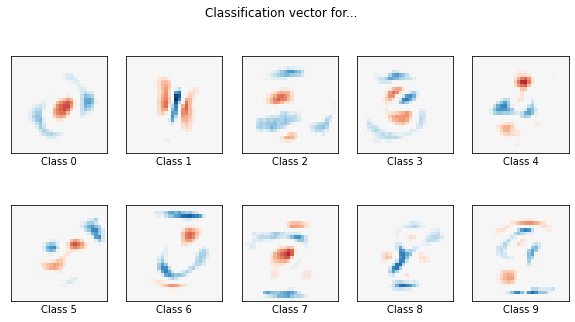

In [22]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()